# Heart Disease Classification 

This excercise involves building differnt classification models like 

- Logistic Regression,

- Decision (Classification) Tree

- Random Forest, and 

- Gradient Boosting

Optimizing the above models using Hyper-parameters and choosing the best model


<img src= "https://odh.ohio.gov/wps/wcm/connect/gov/2c667409-7fa9-4162-9382-64a3774a37ee/GettyImages-908453584+-+Landing+Page.jpg?MOD=AJPERES&CACHEID=ROOTWORKSPACE.Z18_K9I401S01H7F40QBNJU3SO1F56-2c667409-7fa9-4162-9382-64a3774a37ee-mqxZHeJ"/>


# Data Set Information:

This database contains 12 attributes, The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. 

### Metadata:

-  **Age**,       Age of the Person
-  **Sex**,       Gender (Category)

                    - F = Female

                    - M = male

-  **ChestPainType**,        Chest Pain (Category)

                    - TA = typical angina

                    - ATA = atypical anigna

                    - NAP = non-anigna pain

                    - ASY = asymptomatic

-  **RestingBP**,   resting bp
-  **Cholesterol**,      cholestrol
-  **FastingBS**,       fasting blood suger (Category)

                    - 0 => 120mg/dl

                    - 1 =< 120mg/dl

-  **RestingECG**,   resting electrocardiographic results (Category)

                    - Normal = normal

                    - ST = having ST-T wave abnormality

                    - LHV = Showing probable or definite left ventricular hypertrophy

-  **MaxHR**,   Maximum heart rate achieved 
-  **ExerciseAngina**,     excercise induced angina (Category)

                    - N = no

                    - Y = yes

-  **Oldpeak**,   ST Depression induced by excercise relative to rest
-  **ST_Slope**,     The slope of the peak excercise ST Segment (Category)

                    - Up = unsloping

                    - Flat = flat

                    - Down = downsloping

-  **HeartDisease**, The predicted attribute

                    - 0 = for no heart deisease
                    
                    - 1 = if the person has heart disease

# Importing Modules

In [1]:
# data processing
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Scipy
import scipy.stats as stats

# Modelling

from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree # To draw a classification tree
from sklearn.model_selection import cross_val_score # For Cross Validation

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# grid search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import hvplot.pandas

sns.set(style='darkgrid')

# Importing Data

In [2]:
# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv("D:/D_ST/Git_Profile/Heart Disease Classification Models/Data/heart.csv")

#Peeking the data
df.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

# Exploratory Data Analysis

In [3]:
# Shape of Data
print(df.shape)

(918, 12)


In [4]:
# Data types
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [5]:
# Summary of all numerical columns
print(df.describe().T)

              count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0


In [6]:
# Checking for Duplicates
print(len(df[df.duplicated()]))

0


In [7]:
# Checking for null values in each column
print(df.isnull().sum().sum())

0


## Vizualizing data

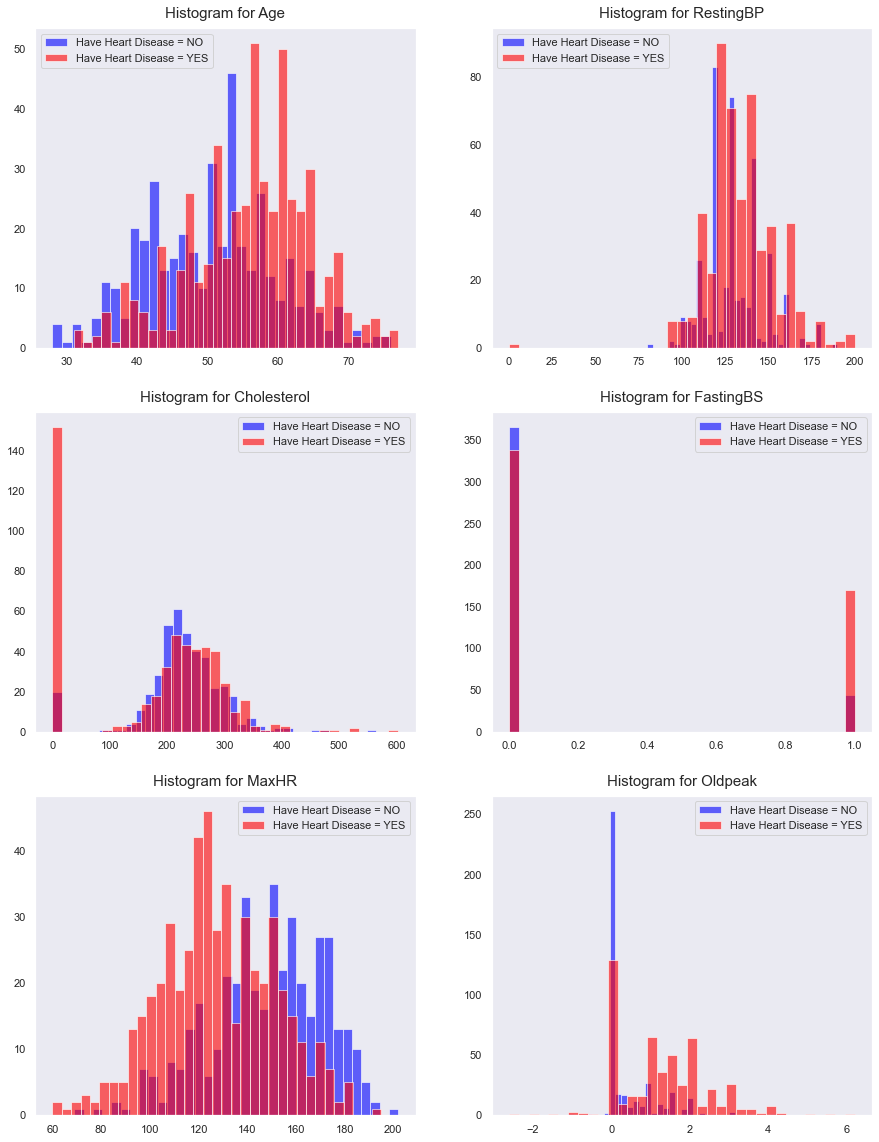

In [8]:
# Visualizing Numerical Columns
ncol = df.columns[df.dtypes !='object'].values
fig, axes= plt.subplots(nrows=3, ncols=2, figsize = (15,20))

for i, x in enumerate(axes.flat):
    column = ncol[i]
    df[df['HeartDisease'] == 0][column].hist(bins=35,ax=x, grid=False, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df['HeartDisease'] == 1][column].hist(bins=35,ax=x, grid=False, color='red', label='Have Heart Disease = YES', alpha=0.6)
    x.set_title(f"Histogram for {column}", size = 15, pad = 10)
    x.legend()

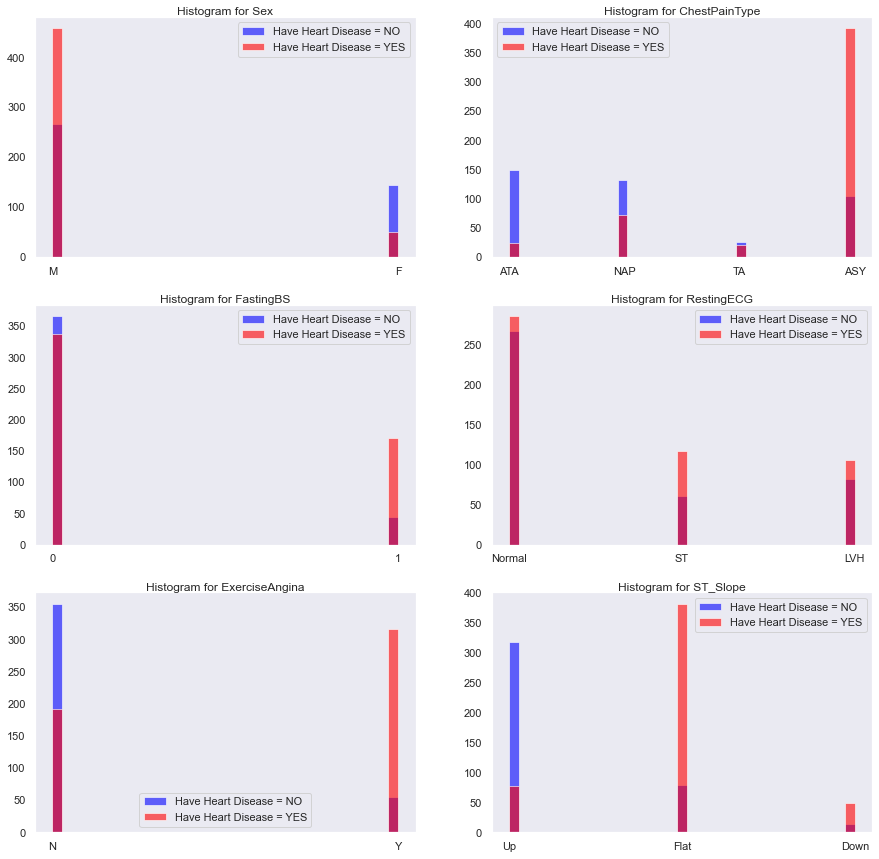

In [9]:
df['FastingBS'] = df['FastingBS'].astype(str)
df['HeartDisease'] = df['HeartDisease'].astype(int)

# Visualizing Categorical Variables
ncol = df.columns[df.dtypes =='object'].values
fig, axes= plt.subplots(nrows=3, ncols=2, figsize = (15,15))

for i, x in enumerate(axes.flat):
    column = ncol[i]
    df[df['HeartDisease'] == 0][column].hist(bins=35,ax=x, grid=False, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df['HeartDisease'] == 1][column].hist(bins=35,ax=x, grid=False, color='red', label='Have Heart Disease = YES', alpha=0.6)
    x.set_title(f"Histogram for {column}", size = 12, pad = 2)
    x.legend()

### Correlation of Numerical Variables

In [10]:
# Vizuzlizing Corr between Heart Disease and Num Features
df.drop('HeartDisease', axis=1).corrwith(df.HeartDisease).hvplot.barh(
    width=600, height=400, 
    title="Corr between Heart Disease and Num Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

All the numerical variables are Significantly correlated, therefore we will keep all these variables.

## Correlation of Categorical Variables

Chi-Square Hypotheis Test for Indepence for Categorical Features

p-value = 0.05

Null Hypothesis (Ho): The 'HeartDisease' Variable is independent on the Cat_Features

Alternate Hypothesis (Ha): The 'HeartDisease' Variable is dependent on the Cat_Features

In [11]:
# Importing chi-square
from scipy.stats import chi2_contingency
Cat_Features = df.columns[df.dtypes =='object'].values
chi2_result = []
for i in Cat_Features:
    if chi2_contingency(pd.crosstab(df['HeartDisease'],df[i]))[1] < 0.05:
        chi2_result.append('Reject Null Hypothesis')
    else:
        chi2_result.append('Fail to Reject Null Hypothesis')
        
result = pd.DataFrame({'Column':Cat_Features, 'HypotheisisResult': chi2_result})
print(result)

           Column       HypotheisisResult
0             Sex  Reject Null Hypothesis
1   ChestPainType  Reject Null Hypothesis
2       FastingBS  Reject Null Hypothesis
3      RestingECG  Reject Null Hypothesis
4  ExerciseAngina  Reject Null Hypothesis
5        ST_Slope  Reject Null Hypothesis


All the categorical variables are Significant therefore we will keep all these variables.

# Modeling Prep

In [12]:
# Columns with independent Variable
X = df.drop('HeartDisease', axis = 1)
X.head()

# Columns with Dependent (Response) Variable
Y = df['HeartDisease']
Y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int32

Since Sklearn does not handel Categorical variables we need to create dummy variables

In [13]:
# Creating dummy Variables for all categorical Variables except FastingBS, it is alreay 0 & 1
X_encoded = pd.get_dummies(X, columns = ['Sex', 'ChestPainType' , 
                                        'RestingECG', 'ExerciseAngina', 'ST_Slope'])
X_encoded.head()

Age  RestingBP  Cholesterol FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
0   40        140          289         0    172      0.0      0      1   
1   49        160          180         0    156      1.0      1      0   
2   37        130          283         0     98      0.0      0      1   
3   48        138          214         0    108      1.5      1      0   
4   54        150          195         0    122      0.0      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                  0                  1                  0                 0   
1                  0                  0                  1                 0   
2                  0                  1                  0                 0   
3                  1                  0                  0                 0   
4                  0                  0                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                 0              0              0            1  
1                 0              0              1            0  
2                 0              0              0            1  
3                 1              0              1            0  
4                 0              0              0            1

In [14]:
# Splitting into test and training dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.3, random_state=42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(642, 20) (642,)
(276, 20) (276,)


## Standardizing the Numerical Values

In [15]:
X_train['Age'] = stats.zscore(X_train['Age'])
X_train['RestingBP'] = stats.zscore(X_train['RestingBP'])
X_train['Cholesterol'] = stats.zscore(X_train['Cholesterol'])
X_train['MaxHR'] = stats.zscore(X_train['MaxHR'])
X_train['Oldpeak'] = stats.zscore(X_train['Oldpeak'])

X_test['Age'] = stats.zscore(X_test['Age'])
X_test['RestingBP'] = stats.zscore(X_test['RestingBP'])
X_test['Cholesterol'] = stats.zscore(X_test['Cholesterol'])
X_test['MaxHR'] = stats.zscore(X_test['MaxHR'])
X_test['Oldpeak'] = stats.zscore(X_test['Oldpeak'])

C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_56068/4194004718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'] = stats.zscore(X_train['Age'])
C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_56068/4194004718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['RestingBP'] = stats.zscore(X_train['RestingBP'])
C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_56068/4194004718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [16]:
# The Columns RestingBP , Cholestrol and Oldpeak has min value = 0

# Number of rows having value zero
# print("RestingBP",len(df.loc[df['RestingBP' ] == 0]))
# print("Cholesterol",len(df.loc[df['Cholesterol' ] == 0]))
#print("Oldpeak",len(df.loc[df['Oldpeak' ] == 0]))


#Replacing these zero values with 99th percentile value

# print(df['RestingBP'].quantile(0.01))
# print(df['Cholesterol'].quantile(0.01))
# print(df['Oldpeak'].quantile(0.01))

# df['RestingBP'] = df['RestingBP'].replace([0],df['RestingBP'].quantile(0.01))
# df['Cholesterol'] = df['Cholesterol'].replace([0],df['Cholesterol'].quantile(0.01))
# df['Oldpeak'] = df['Oldpeak'].replace([0],df['Oldpeak'].quantile(0.01))

#df.plot.box() # do we clean the outtliers

# Logistic Regression

In [17]:
# Creating a Logistic Regression Model
logreg = LogisticRegression()

# Fit Logistic Regression Model
lrm = logreg.fit(X_train,Y_train)

# Predict on test set
Y_pred = lrm.predict(X_test)

In [18]:
#Accuracy Score
LR_score = logreg.score(X_test, Y_test)

#AUC
LRM_AUC = roc_auc_score(Y_test, lrm.predict(X_test))

#Classification Report
cr = classification_report(Y_test, lrm.predict(X_test), output_dict=True)
cr = pd.DataFrame(cr).T

#Classification Matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

#Specificity/Precision
Precision = tn/(tn+fp)

#Sensitivity/Recall
Recall = tp/(tp+fn)

In [19]:
#Printing all the above values
print(f"Accuracy: {LR_score*100: 0.3f} %")
print(f"AUC Score: {LRM_AUC: 0.3f}")


print("True Negative: ",tn )
print("True Positive: ",tp )
print("False Positive: ",fp )
print("False Negative: ",fn )

print(f"Specificity/Precision: {Precision: 0.3f}")
print(f"Sensitivity/Recall: {Recall: 0.3f}")

LR_cnf_matrix = confusion_matrix(Y_test, Y_pred)

#print("Classification Report: ")
#cr


Accuracy:  87.319 %
AUC Score:  0.876
True Negative:  100
True Positive:  141
False Positive:  12
False Negative:  23
Specificity/Precision:  0.893
Sensitivity/Recall:  0.860


Well, we got a accuracy of 87.31%, considered as good accuracy and AUC of 0.876.

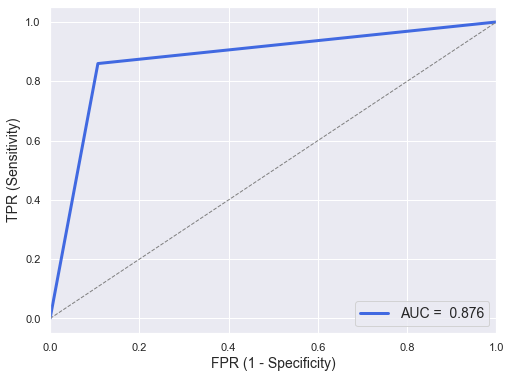

In [20]:
fpr, tpr, thres = roc_curve(Y_test.astype(int), Y_pred.astype(int))
auc = roc_auc_score(Y_test, Y_pred)
LR_scores_test = lrm.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='royalblue', lw=3, label=f'AUC = {auc: 0.3f}')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.xlabel('FPR (1 - Specificity)', fontsize = 14)
plt.ylabel('TPR (Sensitivity)', fontsize = 14)
plt.legend(loc='lower right', fontsize = 14)
plt.show();

# Decision(Classification) Tree

#### Preliminary Decision Tree

[Text(493.4120927762039, 526.6125000000001, 'ST_Slope_Up <= 0.5\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = Has HD'),
 Text(266.601097733711, 492.63750000000005, 'ChestPainType_ASY <= 0.5\ngini = 0.308\nsamples = 368\nvalue = [70, 298]\nclass = Has HD'),
 Text(168.9412181303116, 458.6625, 'Sex_F <= 0.5\ngini = 0.481\nsamples = 109\nvalue = [44, 65]\nclass = Has HD'),
 Text(100.77195467422095, 424.6875, 'MaxHR <= -0.017\ngini = 0.434\nsamples = 88\nvalue = [28, 60]\nclass = Has HD'),
 Text(42.679886685552404, 390.7125, 'RestingBP <= -1.101\ngini = 0.283\nsamples = 41\nvalue = [7, 34]\nclass = Has HD'),
 Text(33.195467422096314, 356.7375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No HD'),
 Text(52.164305949008494, 356.7375, 'ExerciseAngina_N <= 0.5\ngini = 0.255\nsamples = 40\nvalue = [6, 34]\nclass = Has HD'),
 Text(18.96883852691218, 322.76250000000005, 'Cholesterol <= 1.075\ngini = 0.077\nsamples = 25\nvalue = [1, 24]\nclass = Has HD'),
 Text(9.48441926345609, 28

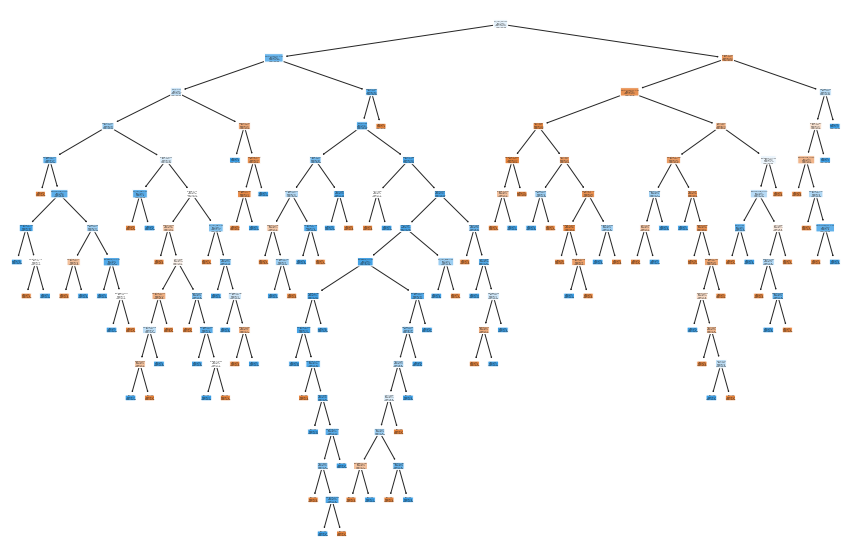

In [21]:
# creating a decision tree with training data set
dtm = DecisionTreeClassifier(random_state=42)
dtm = dtm.fit(X_train, Y_train)

# Vizualizing the tree we built
plt.figure(figsize= (15,10))
plot_tree(dtm, class_names= ["No HD","Has HD"],
                feature_names = X_encoded.columns, 
                filled= True,
                rounded= True)

#### Grid Search 
In order to optimize the model, we use grid search to find the best comn=bination of HyperParameters

In [22]:
# create a list of all parameters we want to test
param_grid = {'max_depth': [2, 3, 4, 5, 6], 'min_samples_leaf': [ 0.05, 0.03, 0.02]}

# define the gridsearch object
dtm_gs = GridSearchCV(dtm, param_grid, cv=5, verbose=2, n_jobs=-1)

# fit the model
dtm_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [0.05, 0.03, 0.02]},
             verbose=2)

In [23]:
# Best Parameters
print ('Best DT Parameters:', dtm_gs.best_params_) 

Best DT Parameters: {'max_depth': 3, 'min_samples_leaf': 0.02}


Best DT Parameters: {'max_depth': 3, 'min_samples_leaf': 0.02}

In [24]:
best_parm = dtm_gs.best_params_
optimal_max_depth = best_parm.get("max_depth")
optimal_min_samples_leaf = best_parm.get("min_samples_leaf")

#### Final decision tree model with optimized hyper Parameter

[Text(837.0, 475.65000000000003, 'ST_Slope_Up <= 0.5\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = Has HD'),
 Text(418.5, 339.75, 'ChestPainType_ASY <= 0.5\ngini = 0.308\nsamples = 368\nvalue = [70, 298]\nclass = Has HD'),
 Text(209.25, 203.85000000000002, 'Sex_F <= 0.5\ngini = 0.481\nsamples = 109\nvalue = [44, 65]\nclass = Has HD'),
 Text(104.625, 67.94999999999999, 'gini = 0.434\nsamples = 88\nvalue = [28, 60]\nclass = Has HD'),
 Text(313.875, 67.94999999999999, 'gini = 0.363\nsamples = 21\nvalue = [16, 5]\nclass = No HD'),
 Text(627.75, 203.85000000000002, 'Sex_M <= 0.5\ngini = 0.181\nsamples = 259\nvalue = [26, 233]\nclass = Has HD'),
 Text(523.125, 67.94999999999999, 'gini = 0.355\nsamples = 39\nvalue = [9, 30]\nclass = Has HD'),
 Text(732.375, 67.94999999999999, 'gini = 0.143\nsamples = 220\nvalue = [17, 203]\nclass = Has HD'),
 Text(1255.5, 339.75, 'Oldpeak <= 0.311\ngini = 0.279\nsamples = 274\nvalue = [228, 46]\nclass = No HD'),
 Text(1046.25, 203.85000000000002, 

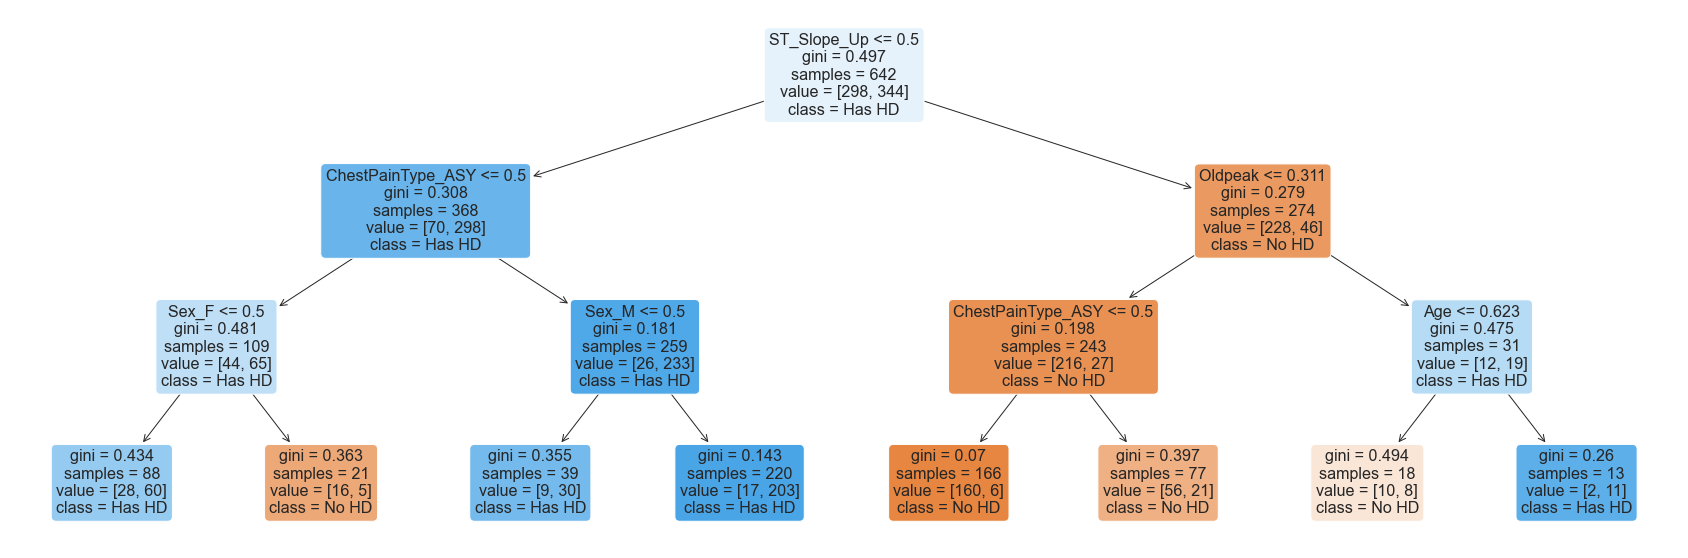

In [25]:
final_dtm = DecisionTreeClassifier( max_depth = optimal_max_depth ,
                                    min_samples_leaf = optimal_min_samples_leaf, 
                                    random_state= 42)
final_dtm_fit = final_dtm.fit(X_train, Y_train)

# Vizualizing the tree we built
plt.figure(figsize= (30,10))
plot_tree(final_dtm_fit, class_names= ["No HD","Has HD"],
                feature_names = X_encoded.columns, 
                filled= True,
                rounded= True)

#### Plotting AUC on training and Test set

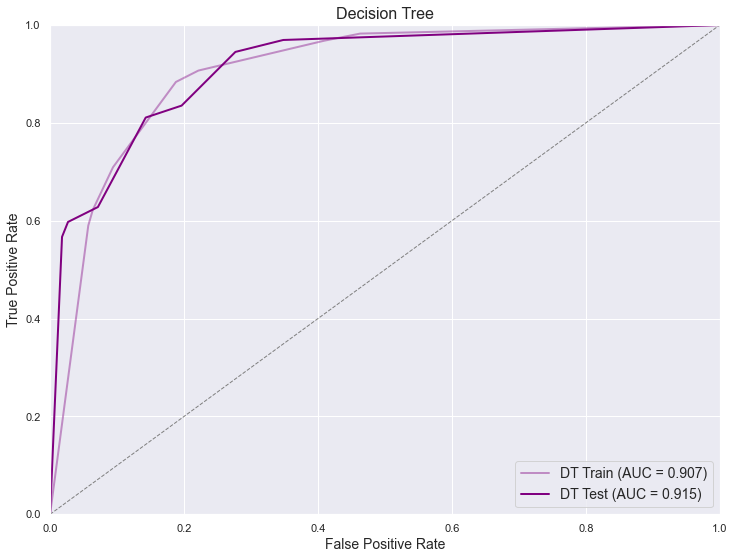

In [26]:
Y_pred_train = final_dtm.predict(X_train).astype(int)
Y_pred_test = final_dtm.predict(X_test).astype(int)

tree_scores_train = final_dtm.predict_proba(X_train)[:, 1]
tree_scores_test = final_dtm.predict_proba(X_test)[:, 1]

tree_fpr_train, tree_tpr_train, _ = roc_curve(Y_train.astype(int), tree_scores_train)
tree_fpr_test, tree_tpr_test, _ = roc_curve(Y_test.astype(int), tree_scores_test)

plt.figure(figsize=(12, 9))

plt.plot(tree_fpr_train, tree_tpr_train, color='purple', lw=2, alpha = 0.4, 
linestyle = '-', label=f'DT Train (AUC = {roc_auc_score(Y_train, tree_scores_train):0.3f})')

plt.plot(tree_fpr_test, tree_tpr_test, color='purple', lw=2, linestyle = '-',
         label=f'DT Test (AUC = {roc_auc_score(Y_test, tree_scores_test):0.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Decision Tree', fontsize= 16)
plt.legend(loc='lower right', fontsize=14);

In [27]:
#Confusion Matrix
DT_cnf_matrix = confusion_matrix(Y_test.astype(int), Y_pred_test)

#Accuracy Score
dtm_score = final_dtm.score(X_test, Y_test)
print(f'Accuracy = {dtm_score}')

#AUC
print(f'DT Train AUC = {roc_auc_score(Y_train, tree_scores_train): 0.3f}')
print(f'DT Test AUC = {roc_auc_score(Y_test, tree_scores_test): 0.3f}')



Accuracy = 0.8297101449275363
DT Train AUC =  0.907
DT Test AUC =  0.915


DT Train AUC =  0.907

DT Test AUC =  0.915

## Cost Complexity pruning

This is some extra stuff while trying to understand another concept. You don't need to check this. But We would appriciate if we can talk about when to use this below method and when we should not. 

Although the accuracy achieved was same as grid search 0.90 on test data but the tree has less leaf node than Grid search.

[Text(1550.0, 1426.95, 'ST_Slope_Up <= 0.5\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = Has HD'),
 Text(930.0, 1019.25, 'ChestPainType_ASY <= 0.5\ngini = 0.308\nsamples = 368\nvalue = [70, 298]\nclass = Has HD'),
 Text(620.0, 611.55, 'Sex_F <= 0.5\ngini = 0.481\nsamples = 109\nvalue = [44, 65]\nclass = Has HD'),
 Text(310.0, 203.8499999999999, 'gini = 0.434\nsamples = 88\nvalue = [28, 60]\nclass = Has HD'),
 Text(930.0, 203.8499999999999, 'gini = 0.363\nsamples = 21\nvalue = [16, 5]\nclass = No HD'),
 Text(1240.0, 611.55, 'gini = 0.181\nsamples = 259\nvalue = [26, 233]\nclass = Has HD'),
 Text(2170.0, 1019.25, 'Oldpeak <= 0.311\ngini = 0.279\nsamples = 274\nvalue = [228, 46]\nclass = No HD'),
 Text(1860.0, 611.55, 'ChestPainType_ASY <= 0.5\ngini = 0.198\nsamples = 243\nvalue = [216, 27]\nclass = No HD'),
 Text(1550.0, 203.8499999999999, 'gini = 0.07\nsamples = 166\nvalue = [160, 6]\nclass = No HD'),
 Text(2170.0, 203.8499999999999, 'gini = 0.397\nsamples = 77\nvalue = [56,

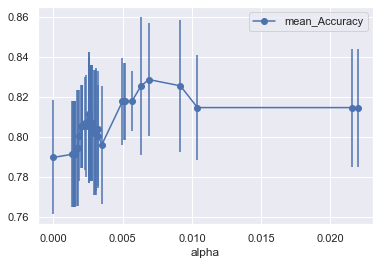

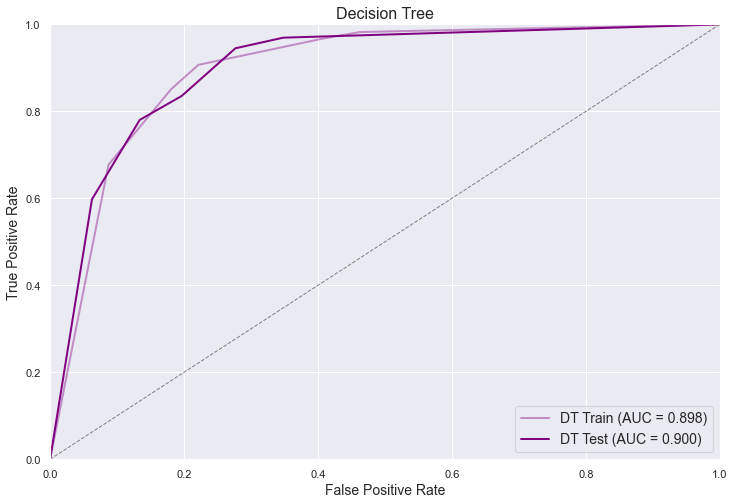

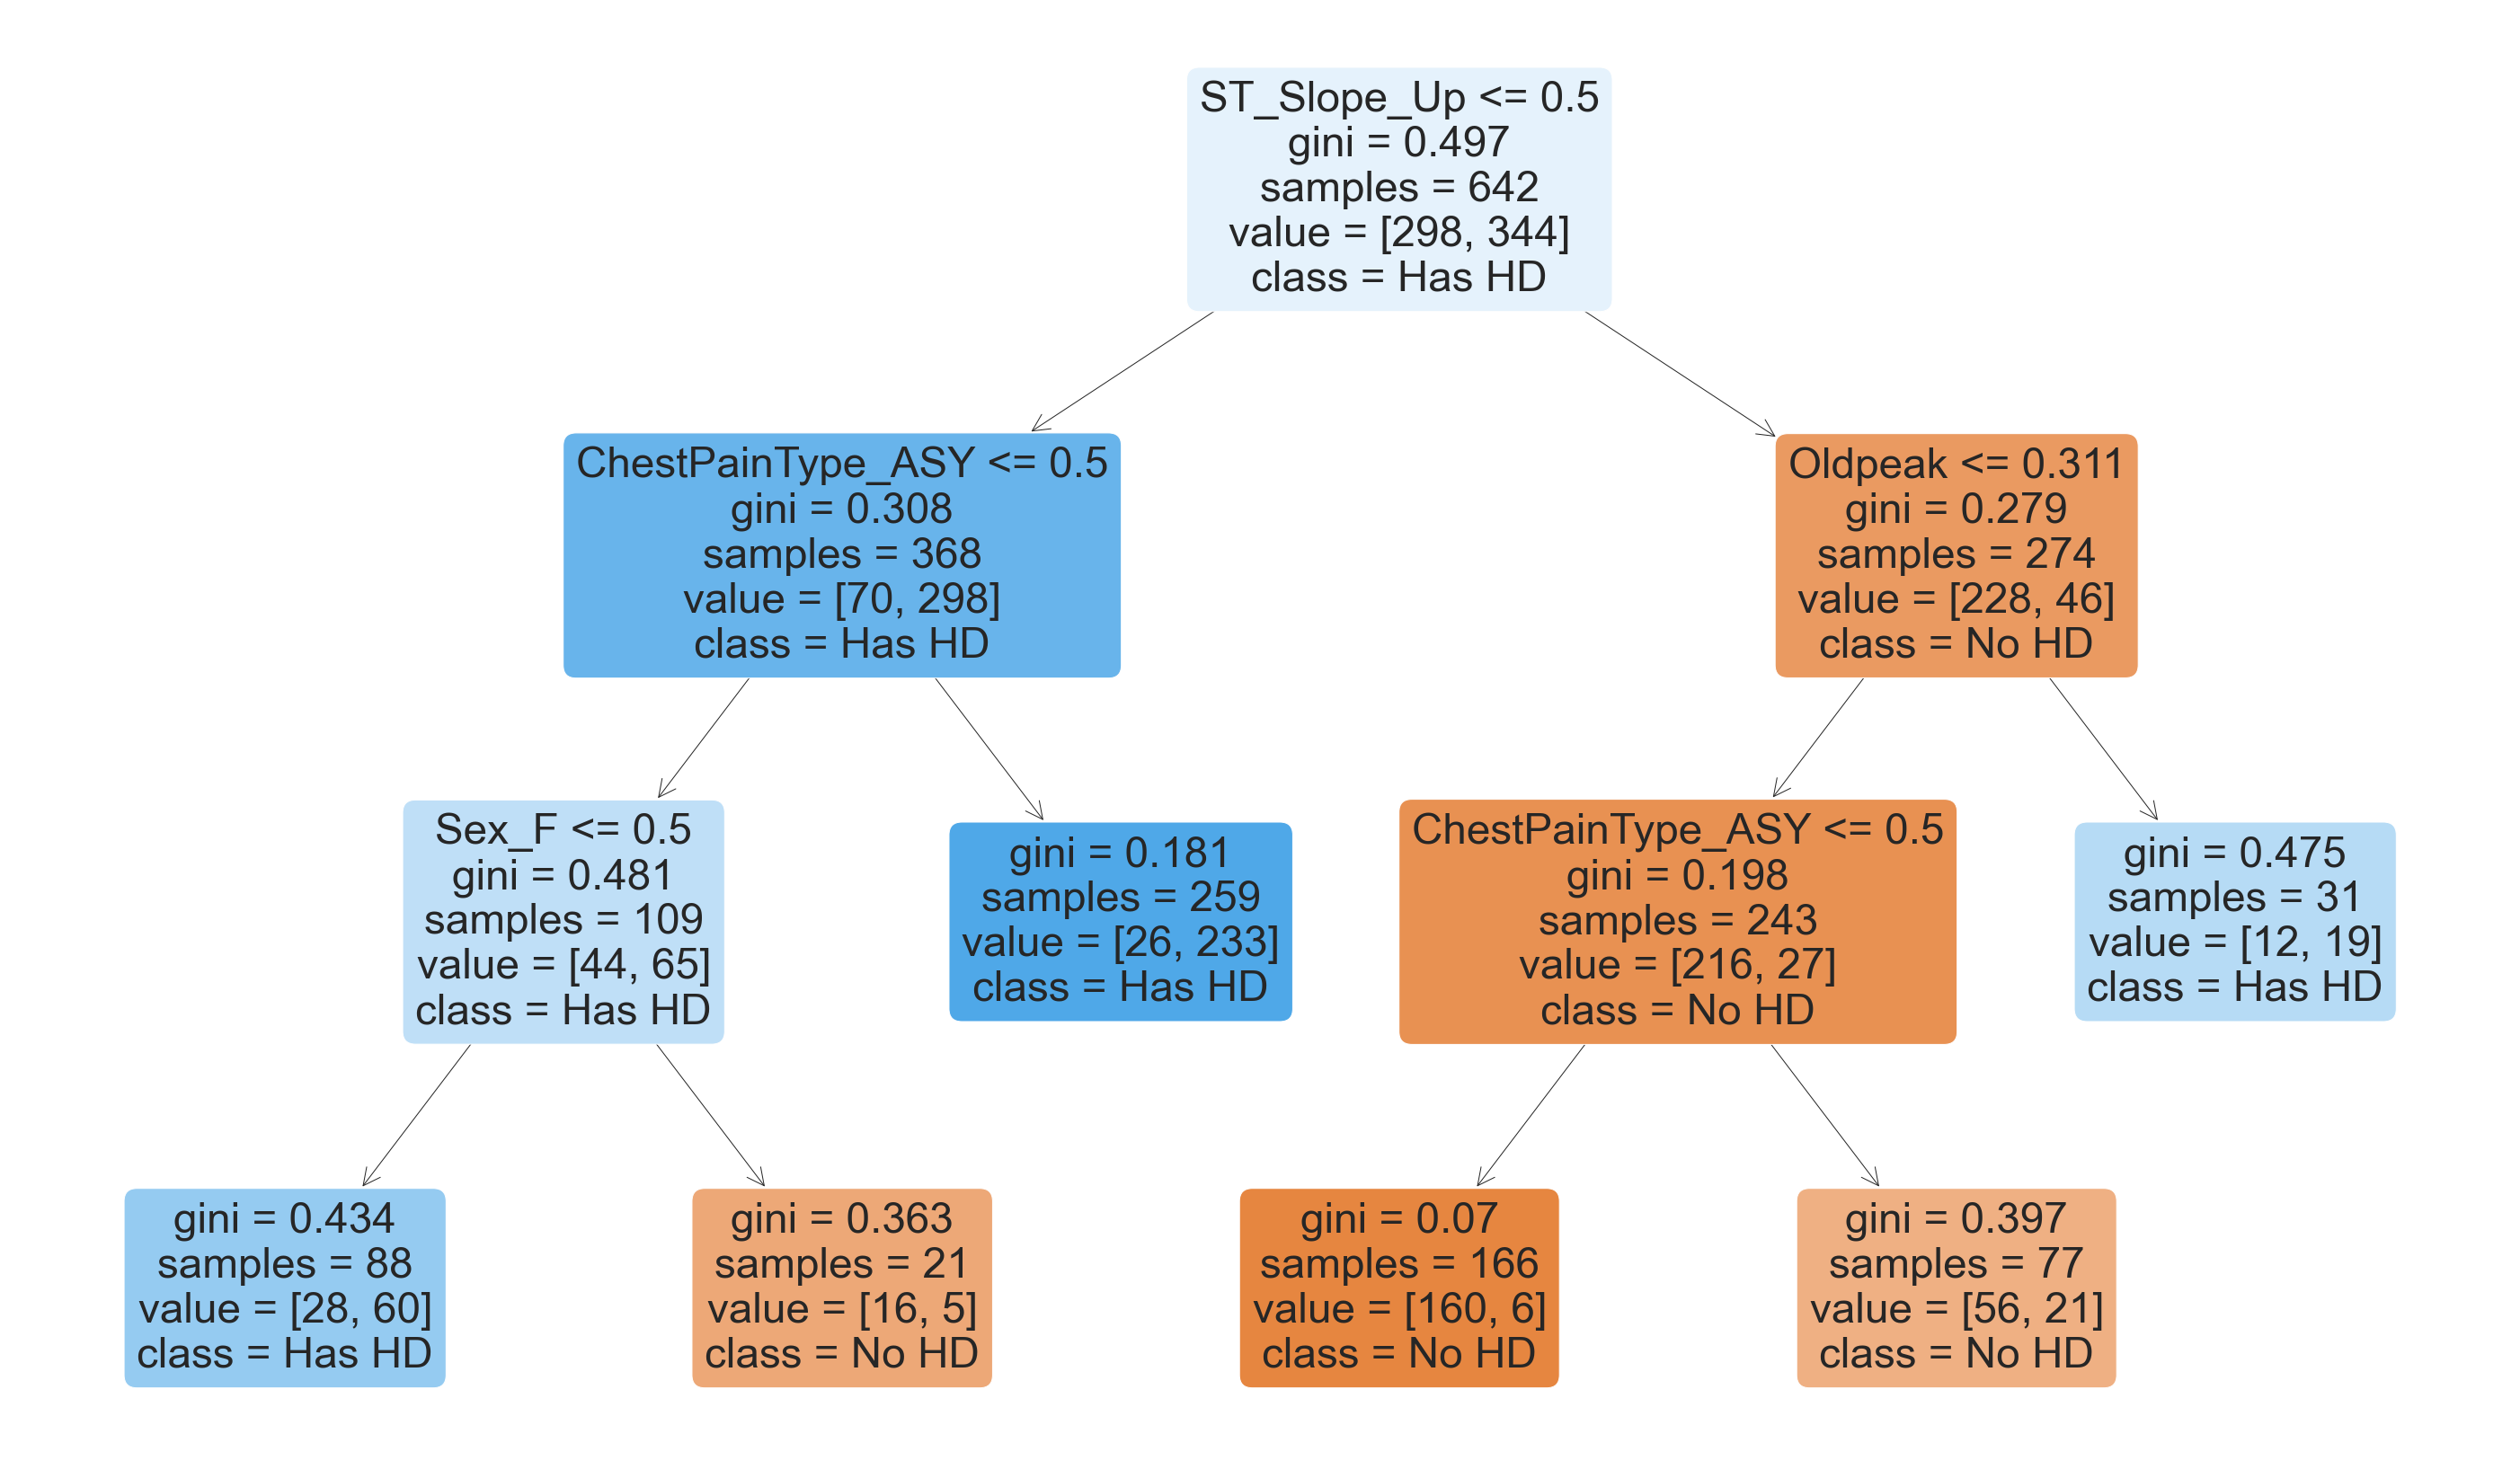

In [28]:
## Cost Complexity pruning

#Creating Variable to hold Alpha values for pruning
path = dtm.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

# Performing K-fold cross validation for each Alpha value
alpha_values = []

for i in ccp_alphas:
    dtm = DecisionTreeClassifier(random_state= 0 , ccp_alpha=i)
    scores = cross_val_score(dtm, X_train, Y_train, cv = 5)
    alpha_values.append( [i, np.mean(scores), np.std(scores)] )
alpha_results = pd.DataFrame( alpha_values, columns=['alpha', 'mean_Accuracy', 'std'])
optimal_alpha = alpha_results.sort_values(by = 'mean_Accuracy', ascending= False)[:1]
optimal_alpha

# Visualizing the Accuracy
alpha_results.plot(x = 'alpha',y = 'mean_Accuracy', yerr = 'std',marker = 'o')

# Fitting the Model with the optimal Alpha
o_alpha = float(optimal_alpha['alpha'])

final_dtm_Pruning = DecisionTreeClassifier(random_state= 42, ccp_alpha= o_alpha)
final_dtm_fit_Pruning = final_dtm_Pruning.fit(X_train, Y_train)

# Plotting the AUC
Y_pred_train = final_dtm_Pruning.predict(X_train).astype(int)
Y_pred_test = final_dtm_Pruning.predict(X_test).astype(int)

tree_scores_train = final_dtm_Pruning.predict_proba(X_train)[:, 1]
tree_scores_test = final_dtm_Pruning.predict_proba(X_test)[:, 1]

tree_fpr_train, tree_tpr_train, _ = roc_curve(Y_train.astype(int), tree_scores_train)
tree_fpr_test, tree_tpr_test, _ = roc_curve(Y_test.astype(int), tree_scores_test)

plt.figure(figsize=(12, 8))

plt.plot(tree_fpr_train, tree_tpr_train, color='purple', lw=2, alpha = 0.4, 
linestyle = '-', label=f'DT Train (AUC = {roc_auc_score(Y_train, tree_scores_train):0.3f})')

plt.plot(tree_fpr_test, tree_tpr_test, color='purple', lw=2, linestyle = '-',
         label=f'DT Test (AUC = {roc_auc_score(Y_test, tree_scores_test):0.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Decision Tree', fontsize= 16)
plt.legend(loc='lower right', fontsize=14);

# Vizualizing the tree we built
plt.figure(figsize= (50,30))
plot_tree(final_dtm_fit_Pruning, class_names= ["No HD","Has HD"],
                feature_names = X_encoded.columns, 
                filled= True,
                rounded= True)

Cost Pruning method resulted in almost same tree with Less leaf nodes and same AUC.

# Random Forest

In [29]:
forest = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [200, 300], 
              'max_depth': [3,4,5,6],
              'min_samples_leaf': [0.02, 0.05],
              'bootstrap': [True, False]}

forest_gs = RandomizedSearchCV(forest, param_grid, cv=5, verbose=2, n_iter=10,
                               n_jobs=-1, random_state=42)

forest_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [0.02, 0.05],
                                        'n_estimators': [200, 300]},
                   random_state=42, verbose=2)

In [30]:
print ('Best RF Parameters:', forest_gs.best_params_) 

Best RF Parameters: {'n_estimators': 300, 'min_samples_leaf': 0.02, 'max_depth': 5, 'bootstrap': True}


Best RF Parameters: {'n_estimators':300, 'min_samples_leaf': 0.02, 'max_depth': 5, 'bootstrap': True}

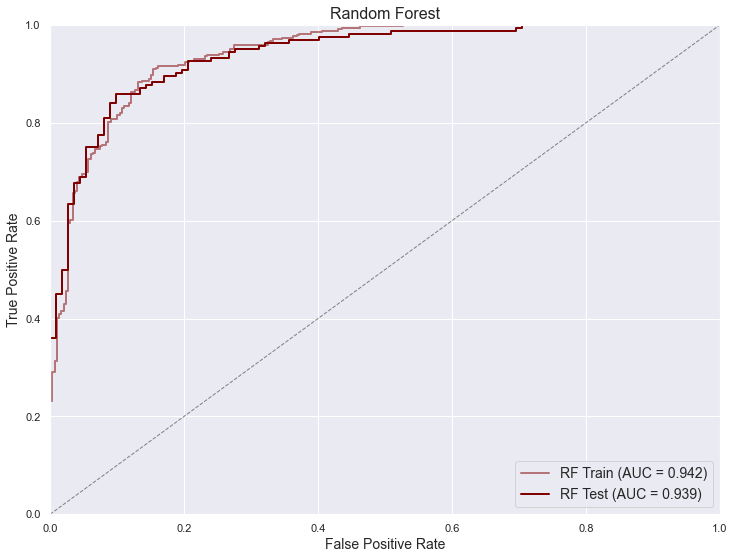

In [31]:
Y_pred_train = forest_gs.predict(X_train).astype(int)
Y_pred_test = forest_gs.predict(X_test).astype(int)

forest_scores_train = forest_gs.predict_proba(X_train)[:, 1]
forest_scores_test = forest_gs.predict_proba(X_test)[:, 1]

forest_fpr_train, forest_tpr_train, _ = roc_curve(Y_train.astype(int), forest_scores_train)
forest_fpr_test, forest_tpr_test, _ = roc_curve(Y_test.astype(int), forest_scores_test)

plt.figure(figsize=(12, 9))

plt.plot(forest_fpr_train, forest_tpr_train, color='maroon', lw=2, alpha = 0.5, linestyle = '-',
         label=f'RF Train (AUC = {roc_auc_score(Y_train, forest_scores_train):0.3f})')

plt.plot(forest_fpr_test, forest_tpr_test, color='maroon', lw=2, linestyle = '-',
         label=f'RF Test (AUC = {roc_auc_score(Y_test, forest_scores_test):0.3f})')


plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Random Forest', fontsize=16)
plt.legend(loc='lower right', fontsize=14);

In [32]:
#Confusion Matrix
rf_cnf_matrix = confusion_matrix(Y_test.astype(int), Y_pred_test)

#Accuracy Score
forest_score = forest_gs.score(X_test, Y_test)
print(f'Accuracy = {forest_score}')

#AUC
print(f'RF Train AUC = {roc_auc_score(Y_train, forest_scores_train):0.3f}')
print(f'RF Test AUC = {roc_auc_score(Y_test, forest_scores_test):0.3f}')

Accuracy = 0.8659420289855072
RF Train AUC = 0.942
RF Test AUC = 0.939


Accuracy = 0.86

RF Train AUC = 0.94.2

RF Test AUC = 0.939

# Gradiant Boosting

In [33]:
gbm = GradientBoostingClassifier(random_state=42)

param_grid = {'n_estimators': [100, 300, 500], 
              'learning_rate': [0.05, 0.1],
              'max_depth': [3, 4, 5, 6],
              'min_samples_leaf': [0.01, 0.02, 0.05]}

gbm_rs = RandomizedSearchCV(gbm, param_grid, cv=3, n_iter=10, n_jobs=-1, random_state=42)

gbm_rs.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [0.01, 0.02, 0.05],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42)

In [34]:
print ('Best GBM Parameters:', gbm_rs.best_params_)

Best GBM Parameters: {'n_estimators': 100, 'min_samples_leaf': 0.01, 'max_depth': 3, 'learning_rate': 0.05}


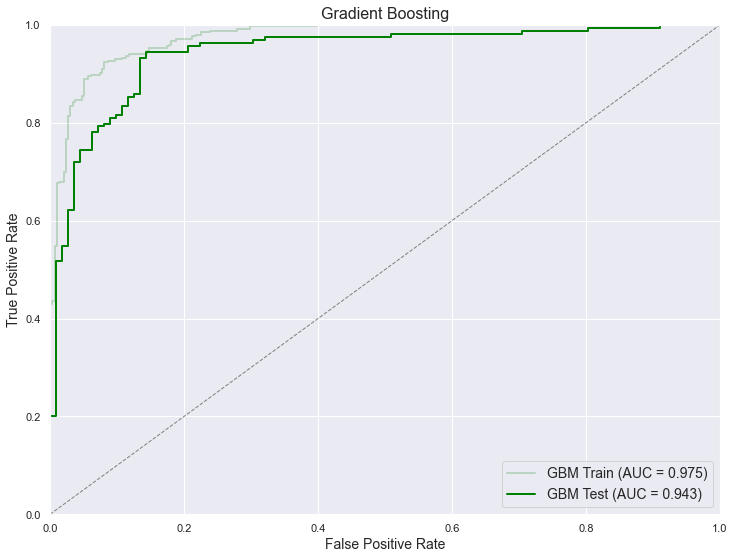

In [35]:
Y_pred_train = gbm_rs.predict(X_train).astype(int)
Y_pred_test = gbm_rs.predict(X_test).astype(int)

gbm_scores_train = gbm_rs.predict_proba(X_train)[:, 1]
gbm_scores_test = gbm_rs.predict_proba(X_test)[:, 1]

gbm_fpr_train, gbm_tpr_train, _ = roc_curve(Y_train.astype(int), gbm_scores_train)
gbm_fpr_test, gbm_tpr_test, _ = roc_curve(Y_test.astype(int), gbm_scores_test)

plt.figure(figsize=(12, 9))

plt.plot(gbm_fpr_train, gbm_tpr_train, color='green', lw=2, alpha = 0.2, linestyle = '-',
         label=f'GBM Train (AUC = {roc_auc_score(Y_train, gbm_scores_train):0.3f})')

plt.plot(gbm_fpr_test, gbm_tpr_test, color='green', lw=2, linestyle = '-',
         label=f'GBM Test (AUC = {roc_auc_score(Y_test, gbm_scores_test):0.3f})')


plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Gradient Boosting', fontsize=16)
plt.legend(loc='lower right', fontsize=14);

In [36]:
#Confusion Matrix
gbm_cnf_matrix = confusion_matrix(Y_test.astype(int), Y_pred_test)

#Accuracy Score
gbm_score = gbm_rs.score(X_test, Y_test)
print(f'Accuracy = {gbm_score}')

#AUC
print(f'GBM Train AUC = {roc_auc_score(Y_train, gbm_scores_train):0.3f}')
print(f'GBM Test AUC = {roc_auc_score(Y_test, gbm_scores_test):0.3f}')

Accuracy = 0.8659420289855072
GBM Train AUC = 0.975
GBM Test AUC = 0.943


Accuracy = 0.86

GBM Train AUC = 0.985

GBM Test AUC = 0.945

# Model Comparision

### AUC

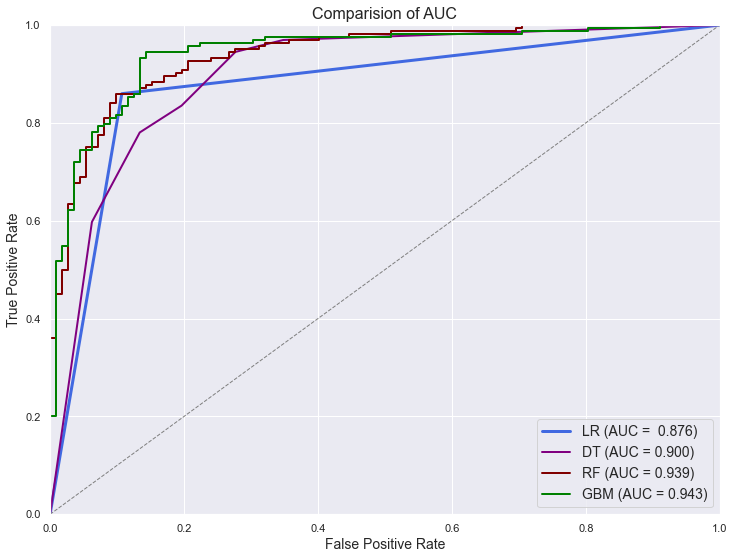

In [37]:
plt.figure(figsize=(12, 9))

plt.plot(fpr, tpr, color='royalblue', lw=3, label=f'LR (AUC = {auc: 0.3f})')

plt.plot(tree_fpr_test, tree_tpr_test, color='purple', lw=2, linestyle = '-',
         label=f'DT (AUC = {roc_auc_score(Y_test, tree_scores_test):0.3f})')

plt.plot(forest_fpr_test, forest_tpr_test, color='maroon', lw=2, linestyle = '-',
         label=f'RF (AUC = {roc_auc_score(Y_test, forest_scores_test):0.3f})')

plt.plot(gbm_fpr_test, gbm_tpr_test, color='green', lw=2, linestyle = '-',
    label=f'GBM (AUC = {roc_auc_score(Y_test, gbm_scores_test):0.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Comparision of AUC', fontsize=16)
plt.legend(loc='lower right', fontsize=14);

GBM Model has the highest AUC followed by Random Forest

### Confusion Matrix

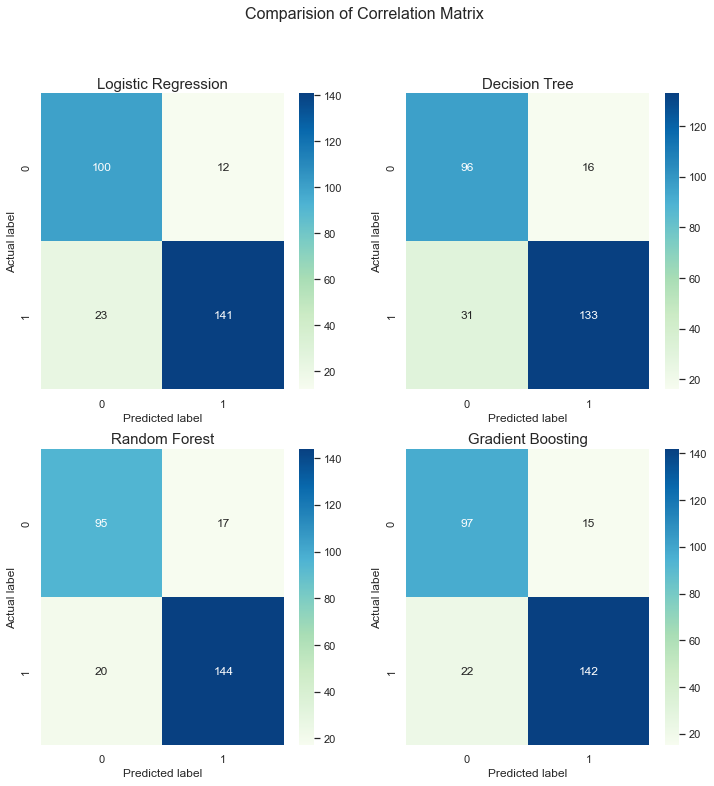

In [38]:
# Visualizing Confusion Matrix
conf_matrix = [LR_cnf_matrix , DT_cnf_matrix, rf_cnf_matrix , gbm_cnf_matrix]
conf_matrix_name = ['Logistic Regression' , 'Decision Tree', 'Random Forest' , 'Gradient Boosting']
fig, axes= plt.subplots(nrows=2, ncols=2, figsize = (12,12))

for i, x in enumerate(axes.flat):
    mat_name = conf_matrix_name[i]
    mat = conf_matrix[i]
    sns.heatmap(pd.DataFrame(mat), annot=True, cmap="GnBu" ,fmt='g', ax=x)
    x.set_title(f'{mat_name}', size = 15, pad = 5)
    x.set_xlabel('Predicted label')
    x.set_ylabel('Actual label')
    fig.suptitle('Comparision of Correlation Matrix', fontsize=16)

In our case it is important to have less number of False Negative cases, we don't want to give a negative result to a person who has a HeartDisease. Therefore, We would want to choose Random Forest Model.

### Log Loss

In [39]:
print('LogLoss LR:', round(log_loss(Y_test, lrm.predict_proba(X_test)), 5))
print('LogLoss DT:', round(log_loss(Y_test, final_dtm.predict_proba(X_test)), 5))
print('LogLoss RF:', round(log_loss(Y_test, forest_gs.predict_proba(X_test)), 5))
print('LogLoss GBM:', round(log_loss(Y_test,gbm_rs.predict_proba(X_test)), 5))

LogLoss LR: 0.31407
LogLoss DT: 0.37982
LogLoss RF: 0.34928
LogLoss GBM: 0.31218


LogLoss LR: 0.31072

LogLoss DT: 0.38489

LogLoss RF: 0.37161

LogLoss GBM: 0.31394

The Lowest Log Value is for Logistics Regression = 0.3107 followed by GBM Model = 0.3139

### Plotting Predicted Probabilities

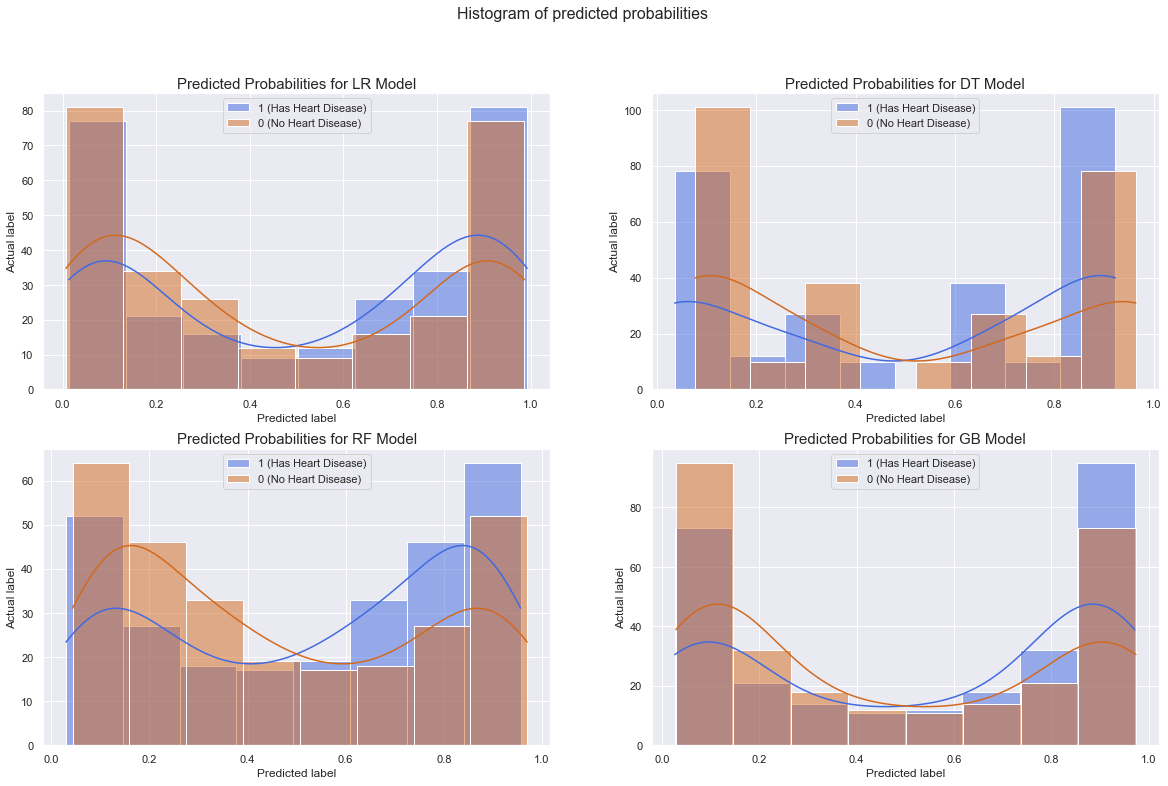

In [40]:
# Visualizing Confusion Matrix
_model = [lrm , final_dtm, forest_gs , gbm_rs]
_name = ['LR' , 'DT', 'RF' , 'GB']
fig, axes= plt.subplots(nrows=2, ncols=2, figsize = (20,12))

for i, x in enumerate(axes.flat):
    model = _model[i]
    name = _name[i]
    sns.histplot(model.predict_proba(X_test)[:, 1], bins=8, color='royalblue', kde=True, label="1 (Has Heart Disease)" , ax=x)
    sns.histplot(model.predict_proba(X_test)[:, 0], bins=8, color='chocolate', kde=True, label="0 (No Heart Disease)" , ax=x)
    x.set_title(f'Predicted Probabilities for {name} Model', size = 15, pad = 5)
    x.set_xlabel('Predicted label')
    x.set_ylabel('Actual label')
    fig.suptitle('Histogram of predicted probabilities', fontsize=16)
    x.legend()

### Correlation Matrix for Predicted Probability

In [52]:
data = {
        'LRM': forest_gs.predict_proba(X_test)[:, 1],
        'DTM': final_dtm.predict_proba(X_test)[:, 1],
        'RF': forest_gs.predict_proba(X_test)[:, 1],
        'GBM': gbm_rs.predict_proba(X_test)[:, 1],
        }

data  = pd.DataFrame(data)

# creation of correlation matrix
corrM = data.corr()

corrM

LRM       DTM        RF       GBM
LRM  1.000000  0.928480  1.000000  0.957682
DTM  0.928480  1.000000  0.928480  0.919829
RF   1.000000  0.928480  1.000000  0.957682
GBM  0.957682  0.919829  0.957682  1.000000

Random Forest and Logistics regression gives highly correlated results.

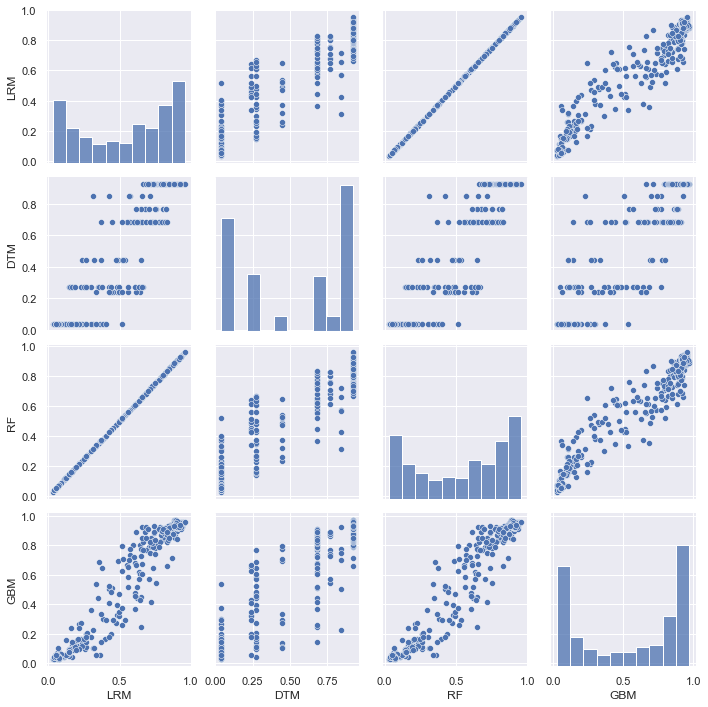

In [53]:
sns.pairplot(data)

It can be seen from the above scatter plot that when compare logistic regression to other models (Decision Tree, Random Forest and Gradianboosting) , the Random forest seems very well calibirated with Logistic Regression. Random Forest is doing better than any other model since it has reduced the variance.

## Conclusion

| Model	| Accuracy	| AUC on Test	| False Negative| LogLoss |
| --- | --- | --- |--- | --- |
| GBM	| 0.86		| 0.943			| 22			| 0.31218 |
| RF	| 0.86		| 0.939			| 20			| 0.34928 |
| DT	| 0.82		| 0.9			| 31			| 0.37982 |
| LR	| 0.87		| 0.876			| 23			| 0.31407 |

Since, The Accuracy for GBM and Random Forest is same and RF has the lowest False negative and AUC is also good we would choose RF model.